In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_style('ticks')
sns.set_context('talk')

#this does some important stuff behind the scenes for plotting specifically for jupyter notebooks (same in vscode), ask us if you want to learn more
%matplotlib inline 

In [2]:
data = pd.read_csv('RNAseq_sample.csv')
data

,gene ID,gene name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Unnamed: 8,Geneid,...,eye-3,wing-1,wing-3,wing-4,Unnamed: 16,positive L2FC means more expression in eye,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,FBgn0003339,Scr,153.456525,3.701985,0.219992,14.812843,1.210000e-49,7.300000e-48,NaN,FBgn0003339,...,208,2,13,14,NaN,NaN,NaN,NaN,NaN,NaN
1,FBgn0003884,alphaTub84B,74479.690690,-0.068624,0.060380,-1.136529,2.557351e-01,4.370844e-01,NaN,FBgn0003884,...,59370,63425,71423,141263,NaN,NaN,NaN,NaN,NaN,NaN
2,FBgn0000629,E(z),1293.055000,-0.160554,0.084901,-1.890988,5.862599e-02,1.481292e-01,NaN,FBgn0000629,...,1000,1196,1149,2678,NaN,NaN,NaN,NaN,NaN,NaN
3,FBgn0001085,fz,2833.789000,-0.336847,0.083351,-4.041263,5.320000e-05,3.337450e-04,NaN,FBgn0001085,...,2190,2811,3095,5259,NaN,NaN,NaN,NaN,NaN,NaN
4,FBgn0000117,arm,20080.220000,0.141912,0.063672,2.228802,2.582708e-02,7.645309e-02,NaN,FBgn0000117,...,17397,16612,18194,33083,NaN,NaN,NaN,NaN,NaN,NaN
5,FBgn0010113,hdc,16667.480000,0.502142,0.072720,6.905113,5.020000e-12,6.810000e-11,NaN,FBgn0010113,...,17195,10859,12190,28021,NaN,NaN,NaN,NaN,NaN,NaN
6,FBgn0003944,Ubx,90.732986,-3.612023,0.243998,-7.311397,2.640000e-13,3.970000e-12,NaN,FBgn0003944,...,0,142,165,363,NaN,NaN,NaN,NaN,NaN,NaN
7,FBgn0003165,pum,7285.838724,0.472420,0.161633,2.922800,3.468990e-03,1.418082e-02,NaN,FBgn0003165,...,7235,4127,5727,12454,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
eye_data_melt = pd.melt(data, id_vars=['gene name'], value_vars=['eye-1', 'eye-2', 'eye-3'])
eye_data_melt


,gene name,variable,value
0,Scr,eye-1,302
1,alphaTub84B,eye-1,68315
2,E(z),eye-1,1120
3,fz,eye-1,2190
4,arm,eye-1,19566
5,hdc,eye-1,17243
6,Ubx,eye-1,1
7,pum,eye-1,8639
8,Scr,eye-2,292
9,alphaTub84B,eye-2,66684


In [28]:
eye_data_melt_sorted = eye_data_melt.sort_values('value')

<AxesSubplot:xlabel='gene name', ylabel='value'>

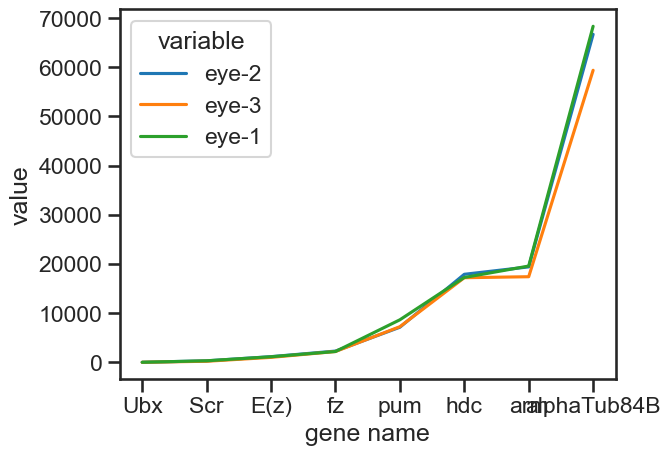

In [29]:
sns.lineplot(data = eye_data_melt_sorted, x = 'gene name', y = 'value', hue='variable')